# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [172]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic information

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Data Cleaning and Preprocessing

#### Handling Missing Values

In [178]:
# checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                     177   19.865320
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   687   77.104377
Embarked                  2    0.224467


In [180]:
# Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Droping column
df.drop(columns=['Cabin'], inplace=True)

C:\Users\Nihal\AppData\Local\Temp\ipykernel_11316\33089311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Nihal\AppData\Local\Temp\ipykernel_11316\33089311.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [181]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data Transformation

In [183]:
# converting categorical features to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [184]:
# drop unnecessary columns like 'Name' and 'Ticket'
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [185]:
# extracting features (X) and target (y)
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

In [186]:
print(X.head())
print()
print("--------------------------------------------------------")
print()
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2

--------------------------------------------------------

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Exploratory Data Analysis (EDA)

#### Visualizations

Text(0.5, 1.0, 'Survival Distribution')

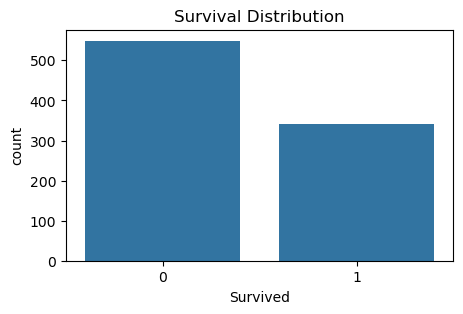

In [189]:
plt.figure(figsize=(5,3))

sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')

Text(0.5, 1.0, 'Survival Rates by Class and Gender')

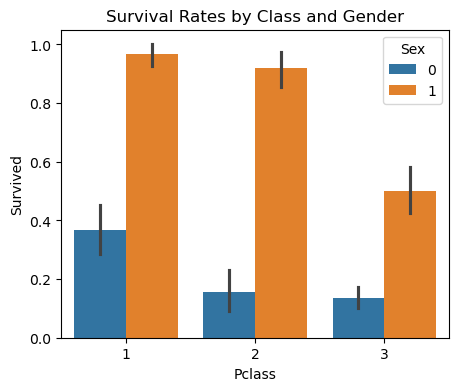

In [190]:
plt.figure(figsize=(5,4))

sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rates by Class and Gender')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

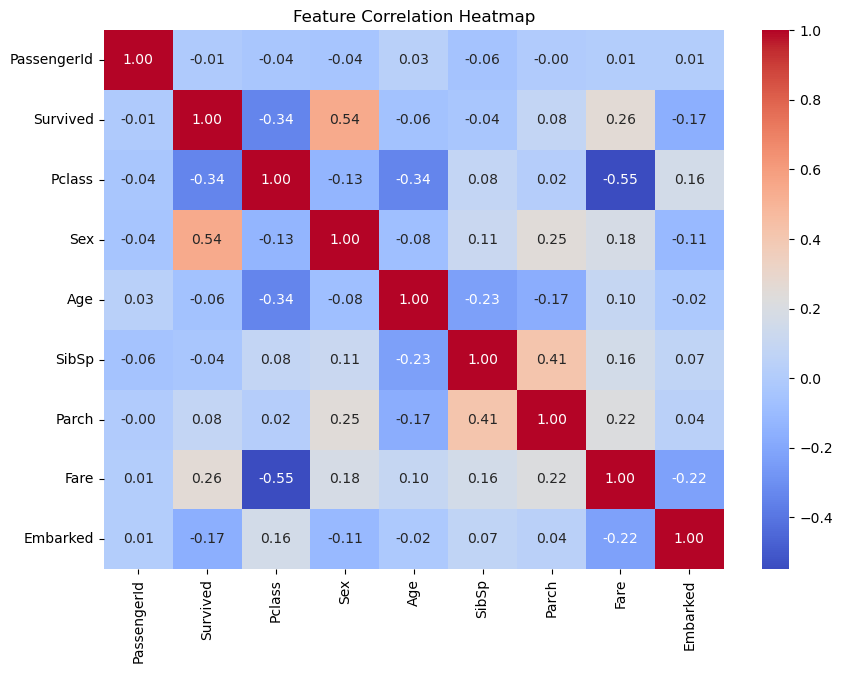

In [191]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

C:\Users\Nihal\AppData\Local\Temp\ipykernel_14640\3159405157.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = titanic.groupby("deck").size()
C:\Users\Nihal\AppData\Local\Temp\ipykernel_14640\3159405157.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
C:\Users\Nihal\AppData\Local\Temp\ipykernel_14640\3159405157.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])


<Axes: xlabel='deck', ylabel='None'>

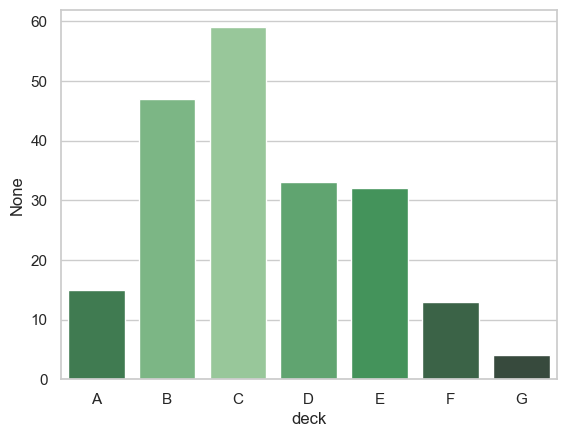

In [7]:
sns.set(style="whitegrid", color_codes=True)

titanic = sns.load_dataset("titanic")
data = titanic.groupby("deck").size()

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])

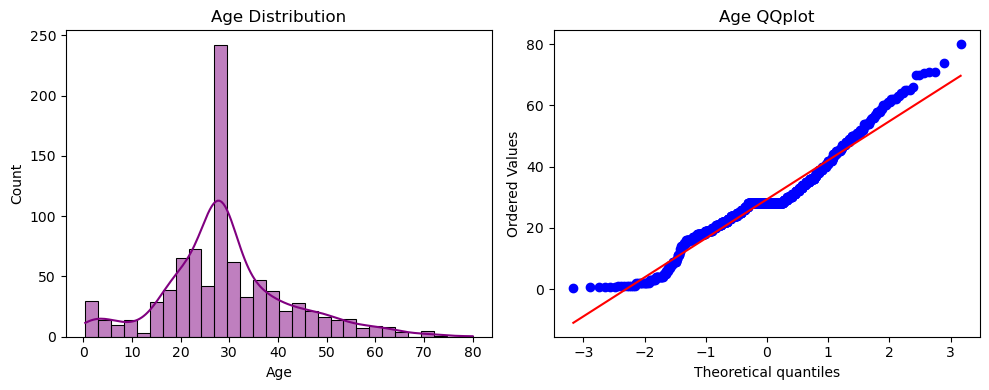

In [192]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, color='purple')
plt.title('Age Distribution')

plt.subplot(1,2,2)
stats.probplot(X['Age'], dist = 'norm', plot = plt)
plt.title('Age QQplot')

plt.tight_layout()

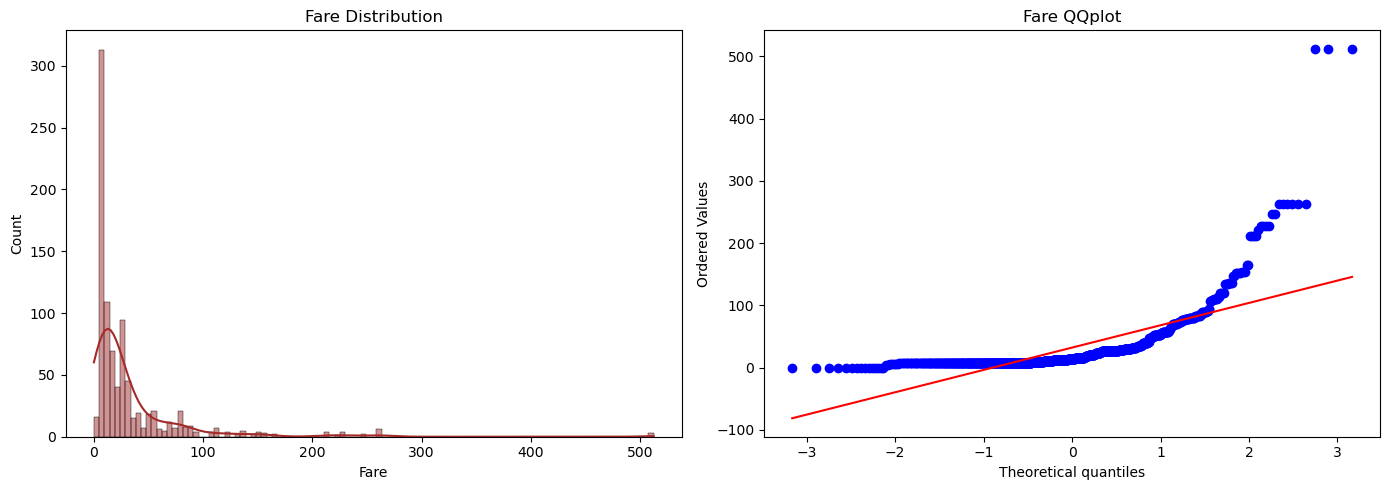

In [193]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
sns.histplot(df['Fare'], kde=True, color='brown')
plt.title('Fare Distribution')

plt.subplot(1,2,2)
stats.probplot(X['Fare'], dist = 'norm', plot = plt)
plt.title('Fare QQplot')

plt.tight_layout()

## Splitting Data and Scaling Features

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

Accuracy: 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



Text(0.5, 1.0, 'Confusion Matrix')

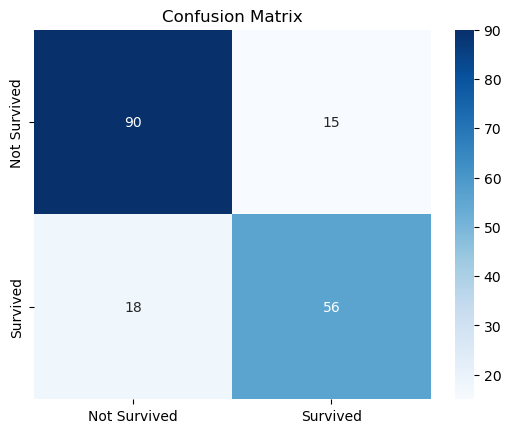

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred = rf_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Feature Importance')

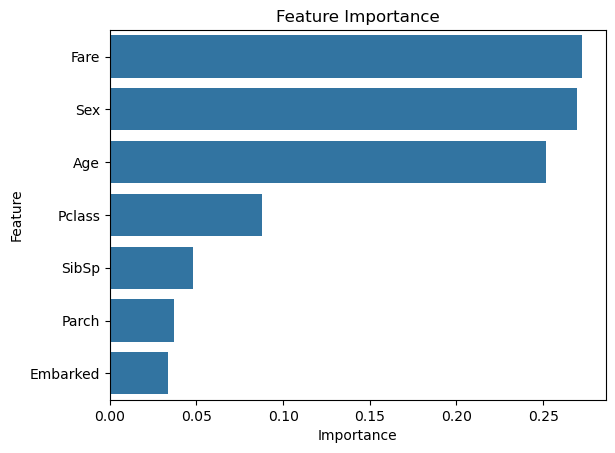

In [198]:
# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')

## Comparing Models

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 0.8045
K-Nearest Neighbors Accuracy: 0.8045
Gradient Boosting Accuracy: 0.8101


## Hyperparameter Tuning

In [202]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.8301


In [203]:
import joblib

# Save the best model
joblib.dump(rf_model, 'titanic_survival_optimized_model.pkl')
print("Model saved successfully!")

Model saved successfully!
